# Forecasting Exchange Rates using Time Series Analysis

**Load and preprocess data**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('D')
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


**Plot the time series**

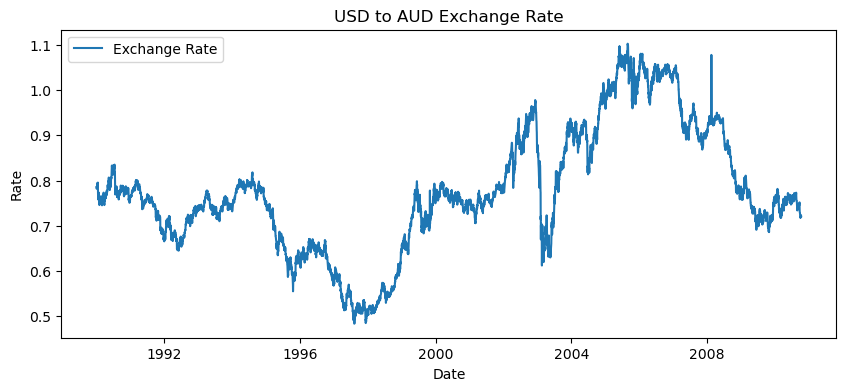

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df['Ex_rate'], label='Exchange Rate')
plt.title('USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend();

## Part 1: ACF and PACF for ARIMA parameter selection

<Figure size 1000x400 with 0 Axes>

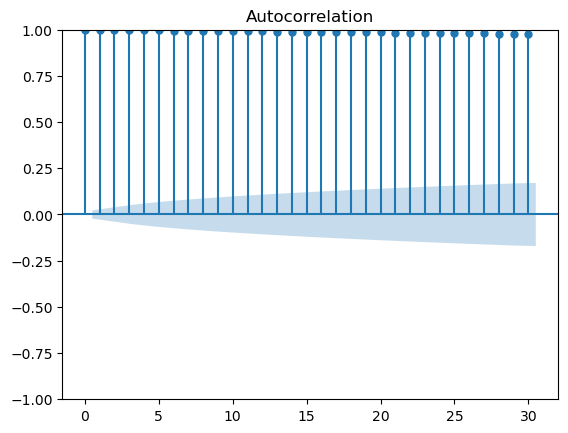

<Figure size 1000x400 with 0 Axes>

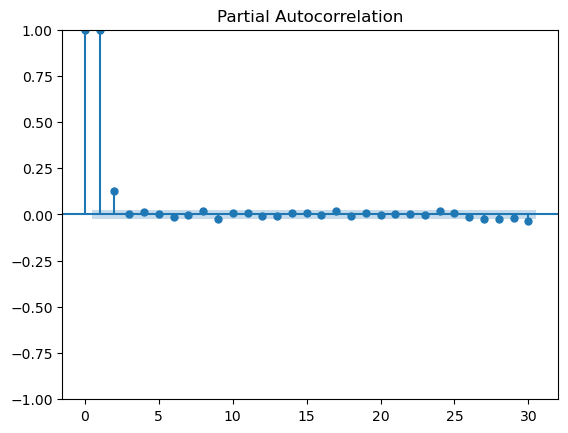

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10,4))
plot_acf(df['Ex_rate'].dropna(), lags=30)
plt.show()
plt.figure(figsize=(10,4))
plot_pacf(df['Ex_rate'].dropna(), lags=30)
plt.show()

## Part 2: ARIMA Modeling

In [27]:
# Split data
from statsmodels.tsa.arima.model import ARIMA
train = df.iloc[:-365]
test = df.iloc[-365:]
# Fit ARIMA(1,1,1)
model_arima = ARIMA(train['Ex_rate'], order=(1,1,1)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7223
Model:                 ARIMA(1, 1, 1)   Log Likelihood               26630.933
Date:                Fri, 04 Jul 2025   AIC                         -53255.866
Time:                        16:33:38   BIC                         -53235.211
Sample:                    01-01-1990   HQIC                        -53248.760
                         - 10-10-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1206      0.046     -2.620      0.009      -0.211      -0.030
ma.L1         -0.0119      0.046     -0.257      0.797      -0.102       0.079
sigma2       3.67e-05   1.04e-07    354.163      0.0

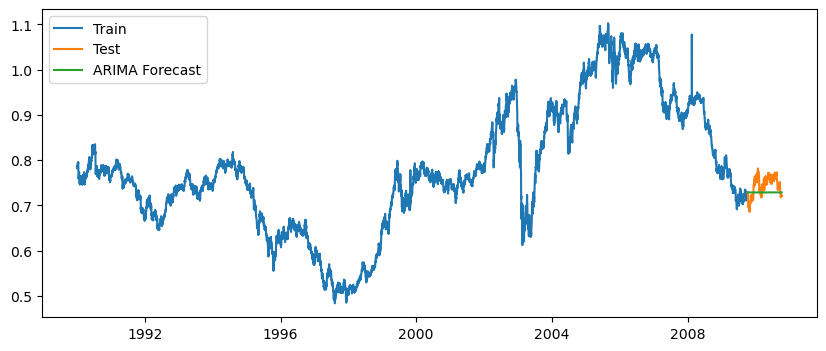

In [29]:
# Forecast
forecast_arima = model_arima.forecast(steps=365)
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Ex_rate'], label='Train')
plt.plot(test.index, test['Ex_rate'], label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.show()

In [30]:
# Compute error metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Ex_rate'], forecast_arima)
rmse_arima = np.sqrt(mse)


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_arima = mean_absolute_error(test['Ex_rate'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test['Ex_rate'], forecast_arima))  # changed here
mape_arima = np.mean(np.abs((test['Ex_rate'] - forecast_arima) / test['Ex_rate'])) * 100
print(f"ARIMA MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.2f}%")


ARIMA MAE: 0.0234, RMSE: 0.0262, MAPE: 3.12%


## Part 3: Exponential Smoothing Modeling

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Fit Holt-Winters (additive trend)
model_es = ExponentialSmoothing(train['Ex_rate'], trend='additive', seasonal=None).fit()

# Forecast
forecast_es = model_es.forecast(365)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
# Compute ES error metrics
mae_es = mean_absolute_error(test['Ex_rate'], forecast_es)
rmse_es = np.sqrt(mean_squared_error(test['Ex_rate'], forecast_es))  # fixed here
mape_es = np.mean(np.abs((test['Ex_rate'] - forecast_es) / test['Ex_rate'])) * 100

print(f"ES MAE: {mae_es:.4f}, RMSE: {rmse_es:.4f}, MAPE: {mape_es:.2f}%")

ES MAE: 0.0252, RMSE: 0.0282, MAPE: 3.36%


## Part 4: Model Comparison and Conclusion
- Compare ARIMA vs Exponential Smoothing based on MAE, RMSE, MAPE.
- Discuss advantages and limitations of each model.
- Conclude which performed best for USD to AUD forecasting.

### Model Evaluation Metrics
ARIMA MAE: 0.0234, RMSE: 0.0262, MAPE: 3.12%